# Task 1

## Web Scraping and Analysis
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

### Web Scraping

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df['reviews'] = reviews

In [4]:
df.head()

,reviews
0,✅ Trip Verified | Quick bag drop at First Win...
1,✅ Trip Verified | 4 Hours before takeoff we r...
2,✅ Trip Verified | I recently had a delay on B...
3,"Not Verified | Boarded on time, but it took a..."
4,"✅ Trip Verified | 5 days before the flight, w..."


Now, We have the dataset for this task. The next thing that should be cleaned from this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Data Analysis

Removing the parts before | in the reviews column

In [5]:
def remove(review):
    return review.split("|")[1]

In [6]:
df.reviews = df.reviews.apply(remove)

In [7]:
df.head()

,reviews
0,Quick bag drop at First Wing but too many pa...
1,4 Hours before takeoff we received a Mail st...
2,I recently had a delay on British Airways fr...
3,"Boarded on time, but it took ages to get to ..."
4,"5 days before the flight, we were advised by..."


### Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

### Data preprocessing steps:

- Cleaning the text

- Tokenization

- Enrichment – POS tagging

- Stopwords removal

- Obtaining the stem words

#### Step 1: Cleaning the text

In [8]:
import re

In [9]:
def clean_text(txt):
    return re.sub('[^A-Za-z]+', ' ', str(txt))

In [10]:
df['cleaned reviews'] = df.reviews.apply(clean_text)

In [11]:
df.head()

,reviews,cleaned reviews
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...


#### Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

In [12]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tayyubnaveed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df['tokens'] = df['cleaned reviews'].apply(lambda txt: word_tokenize(txt))

In [14]:
df.head(1)

,reviews,cleaned reviews,tokens
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[Quick, bag, drop, at, First, Wing, but, too, ..."


#### Step 3: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tayyubnaveed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Step 4: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

In [16]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tayyubnaveed/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tayyubnaveed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

In [19]:
df['pos tagged'] = df['cleaned reviews'].apply(token_stop_pos)
df.head()

,reviews,cleaned reviews,tokens,pos tagged
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[Quick, bag, drop, at, First, Wing, but, too, ...","[(Quick, n), (bag, n), (drop, n), (First, n), ..."
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[Hours, before, takeoff, we, received, a, Mail...","[(Hours, n), (takeoff, n), (received, v), (Mai..."
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[I, recently, had, a, delay, on, British, Airw...","[(recently, r), (delay, n), (British, a), (Air..."
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[Boarded, on, time, but, it, took, ages, to, g...","[(Boarded, v), (time, n), (took, v), (ages, n)..."
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[days, before, the, flight, we, were, advised,...","[(days, n), (flight, n), (advised, v), (BA, n)..."


#### Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [20]:
from nltk.stem import WordNetLemmatizer


In [21]:
wordnet_lemmatizer = WordNetLemmatizer()

In [22]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [23]:
df['Lemma'] = df['pos tagged'].apply(lemmatize)
df.head()

,reviews,cleaned reviews,tokens,pos tagged,Lemma
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[Quick, bag, drop, at, First, Wing, but, too, ...","[(Quick, n), (bag, n), (drop, n), (First, n), ...",Quick bag drop First Wing many passenger use...
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[Hours, before, takeoff, we, received, a, Mail...","[(Hours, n), (takeoff, n), (received, v), (Mai...",Hours takeoff receive Mail state cryptic mes...
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[I, recently, had, a, delay, on, British, Airw...","[(recently, r), (delay, n), (British, a), (Air...",recently delay British Airways BRU LHR due s...
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[Boarded, on, time, but, it, took, ages, to, g...","[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[days, before, the, flight, we, were, advised,...","[(days, n), (flight, n), (advised, v), (BA, n)...",day flight advise BA cancel ask us rebook fl...


## Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [24]:
!pip install vaderSentiment

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [26]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [27]:
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [28]:
df.head()

,reviews,cleaned reviews,tokens,pos tagged,Lemma,Sentiment
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[Quick, bag, drop, at, First, Wing, but, too, ...","[(Quick, n), (bag, n), (drop, n), (First, n), ...",Quick bag drop First Wing many passenger use...,0.9806
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[Hours, before, takeoff, we, received, a, Mail...","[(Hours, n), (takeoff, n), (received, v), (Mai...",Hours takeoff receive Mail state cryptic mes...,-0.8046
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[I, recently, had, a, delay, on, British, Airw...","[(recently, r), (delay, n), (British, a), (Air...",recently delay British Airways BRU LHR due s...,-0.7165
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[Boarded, on, time, but, it, took, ages, to, g...","[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...,0.4404
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[days, before, the, flight, we, were, advised,...","[(days, n), (flight, n), (advised, v), (BA, n)...",day flight advise BA cancel ask us rebook fl...,-0.3167


In [29]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
df['Analysis'] = df['Sentiment'].apply(vader_analysis)

df.head()

,reviews,cleaned reviews,tokens,pos tagged,Lemma,Sentiment,Analysis
0,Quick bag drop at First Wing but too many pa...,Quick bag drop at First Wing but too many pas...,"[Quick, bag, drop, at, First, Wing, but, too, ...","[(Quick, n), (bag, n), (drop, n), (First, n), ...",Quick bag drop First Wing many passenger use...,0.9806,Positive
1,4 Hours before takeoff we received a Mail st...,Hours before takeoff we received a Mail stati...,"[Hours, before, takeoff, we, received, a, Mail...","[(Hours, n), (takeoff, n), (received, v), (Mai...",Hours takeoff receive Mail state cryptic mes...,-0.8046,Negative
2,I recently had a delay on British Airways fr...,I recently had a delay on British Airways fro...,"[I, recently, had, a, delay, on, British, Airw...","[(recently, r), (delay, n), (British, a), (Air...",recently delay British Airways BRU LHR due s...,-0.7165,Negative
3,"Boarded on time, but it took ages to get to ...",Boarded on time but it took ages to get to th...,"[Boarded, on, time, but, it, took, ages, to, g...","[(Boarded, v), (time, n), (took, v), (ages, n)...",Boarded time take age get runway due congest...,0.4404,Neutral
4,"5 days before the flight, we were advised by...",days before the flight we were advised by BA ...,"[days, before, the, flight, we, were, advised,...","[(days, n), (flight, n), (advised, v), (BA, n)...",day flight advise BA cancel ask us rebook fl...,-0.3167,Negative


In [31]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    480
Negative    412
Neutral     108
Name: count, dtype: int64

#### Visual Representation

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

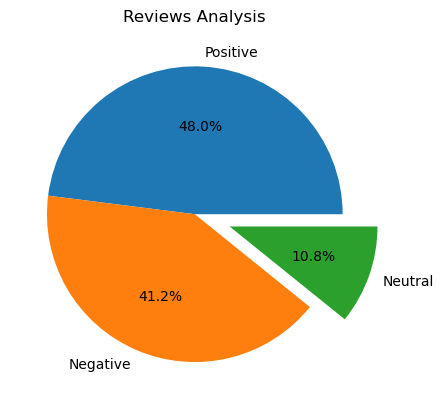

In [33]:
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

In [34]:
df.to_csv("British_airways_reviews.csv")